<a href="https://colab.research.google.com/github/Leo-Vincenzi/PUC-MVP_3/blob/main/MVP3_Leo_vFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_puc_logo.jpg" width="950"/>

# MVP Sprint 3: Engenharia de Dados
## Aluno: Leonardo Braga De Vincenzi
### Título: Portal de Transparência com Informações do Município do Rio de Janeiro
#### (Julho/2024)

## 1 Definição do Problema
---

**Qual o objetivo desse MVP?**

A transparência pública e sua facilitação constitui um dos principais fundamentos da democracia, pois fortalece a capacidade dos indivíduos de participar da tomada das decisões que afetam suas vidas e a dos seus semelhantes.

O objetivo principal desse projeto é construir um Portal de transparência dos municípios do Estado do Rio de Janeiro, com informações geogáficas de desenvolvimento econômico, político e social, utilizando um pipeline de dados e tecnologias na nuvem.

Esse pipeline fará uma busca, coleta, modelagem, carga e análise de alguns dados e índices públicos obtidos sobre os municípios do Rio de Janeiro. Os dados foram escolhidos tendo como base a sua correlação, já que o que procuramos é aumentar o entendimento social, econômico e político desses índices.

O produto final será uma ferramenta de auxílio ao acesso simples e centralizado para quem busca informações econômicas e político-sociais do Estado.

**Como fazer isso?**

Para tal iremos utilizar o apoio na Plataforma Azure Databricks.

1. Busca pelos dados

Há diversas bases de dados e serviços de dados abertos sobre os municípios do Estado do Rio de Janeiro disponíveis na web. Para esse MVP, escolhemos quatro organizações (TCE-RJ, IBGE, IPEA e Wikipédia):

* Dados abertos do TCE-RJ: https://dados.tcerj.tc.br/api/v1/

* API de serviço de dados do IBGE: https://servicodados.ibge.gov.br/api/docs/

* Geo Bases do IPEA: https://www.ipea.gov.br/ipeageo/bases.html

* Wikipédia - Lista de Municípios do RJ: https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Rio_de_Janeiro

* Dados abertos do Governo do Estado do RJ: https://dadosabertos.rj.gov.br/

* Sistema de Informações Contábeis do Setor Público Brasileiro: https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf

* Indicador de Transparência TCE-RJ: https://www.tcerj.tc.br/consulta-processo/Mapa

* Geodata BR - Brasil: https://github.com/tbrugz/geodata-br

Como são dados públicos, a Lei de Acesso à Informação – Lei nº 12.527, de 18 de novembro de 2011 – assegura a todos os cidadãos o direito fundamental de acesso à informação pública, previsto na Constituição Federal, não havendo a necessidade de uma licença de uso para o conjunto de dados escolhidos.

2. Coleta

Uma vez esolhido o conjunto de dados, iremos coletá-los e armazená-los de forma bruta (sem realizar qualquer tipo de limpeza ou transformação) na camada *bronze* da nuvem.

Nossos dados foram coletados de diversas formas, tais como download por meio download de links, WebScaping e, quando disponível, usando a API's do portal selecionado. Procuramos salvá-los no formato "csv".

Dada a grande quantidade de informação disponibilizada, temos a necessidade de se fazer uma modelagem e sua carga, selecionado e armazenando apenas as colunas desejadas, etapa descrita a seguir.

3. Modelagem e carga

Para o nosso Portal, o esquema dados utilizado será bem simplificado. Iremos separar, modelar, tratar e limpar as informações pertinentes em 6 tabelas, descritas abaixo, sempre usando o código "***codigo_rj***" como chave de acesso, código esse usado pelo IBGE para referenciar os municípios brasileiros.

Essas tabelas, após o tratamento ETL, serão salvas no container *silver*.

Em seguida iremos consolidar todos os dados obtidos em uma única tabela (tabelao) no container *gold*. Para isso usaremos o SQL.

Na tabela consolidada teremos reunidos todos os dados políticos-sociais e econômicos para georefenciamento dos municípios e para buscar respostas às nossas perguntas, utilizando em SQL.

          Catálogo de Dados

**Geojs-rj:**
* ***Feature/properties/"id":*** Chave primária igual ao *codigo_rj* das outras bases de dados. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Estado do Rio de Janeiro, o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***Feature/properties/"name":*** Chave primária. Nome do município utilizando tabela ASCII;
* ***Polygon/"coodinates":*** possui valores em formato GPS que define os limites geográficos do município.

**Ibge:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***area:*** É um número *float* com uma casa decimal que indica a quantidade de quilômetros quadrados do município. Teoricamente pode variar de 0,1 a tamanho total do país, mas na prática vaira de 19,4 (Nilópolis) a 4.032,5 (Campos dos Goytacazes);
* ***populacao:*** É um número inteiro que indica a quantidade de pessoas registradas como residentes do município (Censo de 2022). Teoricamente pode variar de 1 a população total do país, mas na prática o número de pessoas varia de 5.415 (Macuco) a 6.211.223 (Rio de Janeiro);
* ***densidade:*** É um número *float* com duas casas decimais que representa a quantidade de habitantes por quilômetro quadrado. Teoricamente pode variar de 0 ao total de habitantes do Estado, mas na prática varia de 12,62 (Santa Maria Madalena) a 12.521,04 (São João de Meriti);
* ***escolaridade:*** É um número *float* com duas casas decimais que representa o percentual de crianças entre 6 a 14 anos matriculadas nas escolas do município (Censo Demográfico de 2010). Teoricamente o índice pode variar entre 0 a 100%, mas na prática ele vai de 93,5% (Sumidouro) a 99,6% (Itaocara);
* ***pib:*** É um número *float* composto de 2 casas decimais representando em reais o valor do PIB per capta do município. O valor, em reais, é um índice que mede a produção, por habitante, do conjunto dos setores que movimenta a economia do município, e indica o seu nível de riqueza econômica. Seu valor teórico pode variar de 0 ao PIB do Brasil. Na prática o valor mínimo é 14.395,69 (Japeri) e máximo de 511.810,82 (Maricá).

**Ipea:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***idhm:*** É um número *float* com três casas decimais que representa o Índice de Desenvolvimento Humano Municipal (IDHM). É  uma medida composta de indicadores de três dimensões do desenvolvimento humano: longevidade, educação e renda. O índice pode variar de 0 a 1. Quanto mais próximo de 1, maior o desenvolvimento humano (Obtido do Programa das Nações Unidas para o Desenvolvimento - PNUD). Na prática o valor mínimo é de 0,611 (Sumidouro) e o máximo é de 0,837 (Niterói).

**TCE:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***receita:*** É um número *float* composto de 2 casas decimais representando o valor total, em reais, das receitas empenhadas pelo Estado para o município. O valor pode variar de 0 ao valor total do Estado do Rio de Janeiro. Na prática tem no mínimo de 30.496.067,61 (Valença) e máximo de 37.784.146.487,00 (Rio de Janeiro). Obtido de receitas orçamentárias realizadas (Anexo I-C), Siconfi, em 2017;
* ***despesa:*** É um número *float* composto de 2 casas decimais representando o valor total, em reais, das despesas empenhadas pelo Estado para o município. O valor pode teoricamente variar de 0 ao valor total do Estado do Rio de Janeiro. Na prática tem o mínimo de 23.646.387,53 (Valença) e máximo de 43.242.247.098,00 (Rio de Janeiro). Obtitido de despesas orçamentárias empenhadas (Anexo I-D), Siconfi, em 2017;
* ***itai:*** É um número *float* com duas casas decimais que representa o Índice de Transparência e Acesso à Informação (ITAI). Permite o cotejamento da situação dos municípios quanto ao efetivo atendimento aos princípios de transparência pública e acesso à informação ante aos requisitos mínimos de Transparência Ativa exigidos pela legislação em vigor. O indicador possui três dimensões, descritas nas seções que se seguem, a saber: i) conteúdo; ii) tempestividade; iii) acessibilidade. O indicador pode assumir valores entre 0 e 1. Na prática os valores estão entre 0,19 (Rio das Flores) e 0,93 (Maricá e Conceição de Macabu). As dimensões que o compõem o índice (conteúdo, tempestividade e acessibilidade) recebem, respectivamente, pesos 60, 25 e 15, de modo a refletirem a gradação de importância relativa entre elas, conforme a expressão algébrica a seguir:

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_formula_itai.jpg"  width="350" align=”middle”>


**Municipio:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***nome_municipio:*** É o nome do município. Existem 92 municípios com nomes diferentes no Estado. Composto de um número de caracteres latinos, é uma *string* que pode variar de 4 (Magé) a 29 (São José do Vale do Rio Preto) caracteres alfabéticos;
* ***regiao:*** É o nome da região do Rio de Janeiro onde se encontra o município. O Estado do Rio de Janeiro é dividido em 6 regiões. São elas: Baixadas, Centro Fluminense, Metropolitana, Noroeste Fluminense, Norte Fluminense, Sul Fluminense. Composto de caracteres latinos, é uma *string* que pode variar de 8 (Baixadas) a 19 caracteres alfabéticos (Noroeste Fluminense);
* ***latitude:*** É a distância em graus entre o ponto geogrático analisado e a linha do equador. Compõe, junto da longitude, o sistema de coordenadas geográficas. Cada dígito decimal da unidade representa a sua precisão, ou seja, com uma casa decimal, a precisão é 11 quilômetros (6 milhas náuticas, ou 6,9 milhas). Com duas casas decimais, a precisão é de  1,1 km. Ou seja, com 6 casas decimais, a precisão é de 0,11 m. Teoricamente esse campo pode variar entre -90.000000 e +90.000000. O município do RJ com maior latitude é Porcíuncula (-20,79777) e o de menor latitude é Paraty (-23,358522);
* ***longitude:*** É a distância em graus entre o ponto geogrático analisado e o meridiano de Greenwich. Compõe, junto da latitude, o sistema de coordenadas geográficas. Cada dígito decimal da unidade representa a sua precisão, ou seja, com uma casa decimal, a precisão é 11 quilômetros (6 milhas náuticas, ou 6,9 milhas). Com duas casas decimais, a precisão é de  1,1 km. Ou seja, com 6 casas decimais, a precisão é de 0,11 m. Teoricamente esse campo pode variar entre -90.000000 e +90.000000. O município do RJ com maior longitude é São João da Barra (-41,010008) e o de menor longitude é Paraty (-44,718486).

**Wiki:**

* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, na lista o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***link_wiki:*** representa o link URL da Wikipédia para acesso a página com informações em formato wiki do município. Em formato string, varia de 35 caracteres (link de Areal) a 79 caracteres (link de Santo Antonio de Pádua).

Aqui temos uma visão de onde os dados se originaram, como mudaram e do destino final dentro do pipeline de dados, construindo um *Data Lake*.

Também construímos um Catálogo de Dados contendo uma descrição dos dados e seus domínios, contendo valores mínimos e máximos esperados para dados numéricos, tamanho de *strings*, e as possibilidades para dados categóricos (região).

4. Análise

Vamos dividir a etapa de análise em duas: qualidade de dados e solução do problema.

          a. Qualidade de dados

Não encontramos problemas com os atributos do nosso conjunto de dados, que se mostraram curados e já bem tratados antes de serem disponibilizados.

Acreditamos que, por terem sido obtidos através de instituições renomadas, que publicam seus dados tendo como balizamento a Lei Federal de Acesso à Informação, os dados foram todos obtidos sem percalços.

Mesmo assim, analisamos estatisticamente os dados por atributo e não encontramos problemas.

          b. Solução do problema

O problema que buscamos solucionar é conseguir disponibilizar, de forma centralizada e visual, informações político-sociais e econômicas sobre os municípios do Rio de Janeiro.

Com o entendimento melhor de como os municípios do Rio de Janeiro se relacionam, acreditamos que o resultado desse projeto possa se tornar o pontapé inicial para criação de um intrumento eletrônico que ajude à definição de políticas públicas que permitam alavancar o desenvolvimento do Estado, e que também permita a mitigação de suas desigualdades.

Aqui também utilizamos algumas bibliotecas Python vistas na disciplina Análise Exploratória e Pré-Processamento de Dados e ferramentas vistas na disciplina Visualização de Informação.

**Premissas sobre os municípios do Rio de Janeiro**

A extração de petróleo e gás natural e, por conseguinte, a indústria petroquímica, lideram seus respectivos setores econômicos no Rio de Janeiro, estado este que abriga a sede da Petrobras, uma das princiais empresas do país.

O estado também possui um litoral recortado por belas praias banhadas pelo oceano Atlântico e que atraem muitos turistas. Sua capital - Cidade do Rio de Janeiro - é o principal destino turístico do país.

A cidade tem também importante acervo histórico, pois desempenhou a função de capital do Brasil entre 1763 e 1960. Dessa forma tem importante papel cultural, pois é conhecido pelo desenvolvimento do samba e berço da bossa nova, gêneros musicais brasileiros que têm maior impacto global. O Rio de Janeiro também é um importante centro de produção cinematográfica e televisiva no Brasil.

Portanto podemos afirmar que, tanto na economia, na cultura como no turismo, o Estado do Rio de Janeiro teve e continua tendo importante papel na construção e no desenvolvimento da identidade e da força da nação brasileira.

**Desafios**

O maior desafio de se trabalhar com informações sobre os municípios do Rio de Janeiro foi, pela quantidade de instituições e de disponibilizada de dados, conseguir filtrar e saber quais são os atributos mais relevantes para o nosso trabalho.

Nesse ponto podemos observar claramente o problema causado atualmente pelo excesso de dados, o famoso *Big Data*.

Como um exemplo apenas, podemos citar a planilha do Ipea <https://www.ipea.gov.br/ipeageo/arquivos/bases/RJ_Mun97_region.xls> disponibilizada e baixada pelo link acima por um *pipeline*.

A quantidade de informação obtida é enorme.

A planilha possui, para cada um dos 92 municípios do RJ, 120 pastas diferentes. E na última pasta (IDHM_2010), 230 colunas de atributos diferentes. Então, somente na última pasta, temos 21.160 valores possíveis de estatística, econometria e de georeferenciamento sobre os minicípios do RJ. E no arquivo dessa planilha ainda temos outras 119 pastas!

Imaginando que cada pasta tenha - para cada um dos 92 municípios - cerca de 100 colunas, facilmente percebemos que não há menor possibilidade de se fazer uma análise dos dados disponibilizados pelo IPEA para o Rio de Janeiro de forma manual.

O que percebemos é que existe um limite tênue entre mostar um conteúdo relevante e interessante, e sobrecarregar a aplicação com excesso de informações. Desafio esse cada vez mais deparado pelo Cientista e Engenheiro de Dados.

Nessa seção inicial configuraremos o MVP para não exibir mensagens de aviso.

In [2]:
# Configurando para não exibir os warnings no meio da execução do MVP
#
import warnings
warnings.filterwarnings("ignore")

Agora importaremos bibliotecas e definiremos padrão de cores do MVP.

In [3]:
# Fazendo os imports das bibliotecas
#
!pip install jupyter-dash
import random
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
import seaborn as sns
import dash_core_components as dcc
import dash_html_components as html
from dash import Dash, dcc, html, Input, Output
import folium # para mapas heatmap e colorpletico
import branca.colormap # para heatmap e colorpletico
from folium.plugins import HeatMap # para heatmap e colorpletico
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from io import BytesIO
from PIL import Image

# Definindo cores
#
cordefalut = '#6688AA'
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00


## 2 ETL Azure Databricks

Abaixo foi copiado o código rodado no notebook Databricks "MVP_Leo Notebook 2024 Azure" e exportado como "Source file" em formato "py".

O objetivo desse código é pegar cinco arquivos CSV da camada *bronze* (tce, ibge, ipea, wiki e municipios) extraídos de diversas formas do ambiente externo, limpá-los e transformá-los em bancos na camada *silver*, e finalmente gerar um banco e um arquvo único CSV na camada *gold*, que reuna os seus principais atributos, para realizar as consultas em SQL e a base para aplicações *dash*.

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_00.JPG" width="1600"/>

In [ ]:
# Databricks notebook source
# ETL usando arquitetura em camadas (p/ extração, transformação e carga) - MVP3 Leonardo Braga De Vincenzi - PUC-Rio
#
import os
#
# - criando container 1 - camada bronze (dado bruto, sem transformação)
#
mount_point = "/mnt/mvpleo/bronze"
already_mounted = any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts())

if already_mounted:
    print("A camada bronze já existe!")
else:
    dbutils.fs.mount(
    source = "wasbs://bronze@mvpleo.blob.core.windows.net",
    extra_configs = {"fs.azure.account.key.mvpleo.blob.core.windows.net":
                    "H0QHQKK17VJoCe5tcS8ei6NkwXSpqg5p88deIrT1/LFuHz/gr1+Kui/awrFCTFt4nQrYEairIO5z+AStCd2nsA=="}
    )
# - criando container 2 - camada silver (tabelas limpas e preparadas para uso do SQL)
#
mount_point = "/mnt/mvpleo/silver"
already_mounted = any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts())

if already_mounted:
        print("A camada silver já existe!")
else:
    dbutils.fs.mount(
    source = "wasbs://silver@mvpleo.blob.core.windows.net",
    extra_configs = {"fs.azure.account.key.mvpleo.blob.core.windows.net":
                    "H0QHQKK17VJoCe5tcS8ei6NkwXSpqg5p88deIrT1/LFuHz/gr1+Kui/awrFCTFt4nQrYEairIO5z+AStCd2nsA=="}
    )
# - criando container 3 - camada gold (visualizações, dashboards, e agregações de tabelas)
#
mount_point = "/mnt/mvpleo/gold"
already_mounted = any(mount.mountPoint == mount_point for mount in dbutils.fs.mounts())

if already_mounted:
        print("A camada gold já existe!")
else:
    dbutils.fs.mount(
    source = "wasbs://gold@mvpleo.blob.core.windows.net",
    extra_configs = {"fs.azure.account.key.mvpleo.blob.core.windows.net":
                      "H0QHQKK17VJoCe5tcS8ei6NkwXSpqg5p88deIrT1/LFuHz/gr1+Kui/awrFCTFt4nQrYEairIO5z+AStCd2nsA=="}
    )

# COMMAND ----------

from pyspark.sql.functions import concat, lit, col, to_date, year, month, regexp_replace
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType
import pandas as pd

# COMMAND ----------

# --------Municipio--------
#
# criando database "municipio"
spark.sql ("DROP DATABASE IF EXISTS municipio CASCADE")
spark.sql ("CREATE DATABASE IF NOT EXISTS municipio")
# lendo arquivo csv do municipio na camada bronze
df_municipio_bronze = spark.read.format('csv').options(header='true', infer_schema='true', delimiter=';', encoding='ISO-8859-1'
    ).load('dbfs:/mnt/mvpleo/bronze/municipio.csv')
#
# eliminando as colunas desnecessárias
df_municipio_silver = df_municipio_bronze.select('codigo_rj', 'nome_municipio', 'regiao', 'latitude', 'longitude')
#
# limpando as linhas vazias das colunas selecionadas
df_municipio_silver = df_municipio_silver.filter(df_municipio_silver.codigo_rj.isNotNull())
df_municipio_silver = df_municipio_silver.filter(df_municipio_silver.nome_municipio.isNotNull())
df_municipio_silver = df_municipio_silver.filter(df_municipio_silver.regiao.isNotNull())
df_municipio_silver = df_municipio_silver.filter(df_municipio_silver.latitude.isNotNull())
df_municipio_silver = df_municipio_silver.filter(df_municipio_silver.longitude.isNotNull())
#
# convertendo campo "codigo_rj" de string p/ "integer"
df_municipio_silver = df_municipio_silver.withColumn('codigo_rj', col('codigo_rj').cast('int'))
# convertendo campo "latitude" de string p/ "float"
df_municipio_silver = df_municipio_silver.withColumn('latitude', regexp_replace(col('latitude'), ',', '.').cast('float'))
# convertendo campo "longitude" de string p/ "float"
df_municipio_silver = df_municipio_silver.withColumn('longitude', regexp_replace(col('longitude'), ',', '.').cast('float'))
#
# gravando arquivo formato Parquet (delta) na camada silver
df_municipio_silver.write.format('delta')\
    .mode('overwrite')\
    .option("overwriteSchema", "true")\
    .save('/mnt/mvpleo/silver/mvp3_municipio')
#
# usando database "municipio"---
spark.sql ('USE SCHEMA municipio')
#
# criando tabela externa
spark.sql("""
          DROP TABLE IF EXISTS mvp3_municipio
          """)
#
spark.sql("""
          CREATE TABLE IF NOT EXISTS mvp3_municipio
          USING DELTA
          LOCATION '/mnt/mvpleo/silver/mvp3_municipio'
          """)
#
# fazendo uma query em mvp3_ipea para exame de conteúdo
mvp3_municipio = spark.sql("SELECT * FROM mvp3_municipio")
#
display(mvp3_municipio)

# COMMAND ----------

# --------IPEA--------
#
# criando database "ipea"
spark.sql ("DROP DATABASE IF EXISTS ipea CASCADE")
spark.sql ("CREATE DATABASE IF NOT EXISTS ipea")
# lendo arquivo csv do Ipea na camada bronze
df_ipea_bronze = spark.read.format('csv').options(header='true', infer_schema='true', delimiter=';'
    ).load('dbfs:/mnt/mvpleo/bronze/RJ_Mun97_region.csv')
#
# eliminando as colunas desnecessárias
df_ipea_silver = df_ipea_bronze.select('Codigo do Municipio', 'IDHM')
#
# renomeando colunas
df_ipea_silver = df_ipea_silver.withColumnRenamed('Codigo do Municipio','codigo_rj').withColumnRenamed('IDHM','idhm')
#
# limpando as linhas vazias das colunas selecionadas
df_ipea_silver = df_ipea_silver.filter(df_ipea_silver.codigo_rj.isNotNull())
df_ipea_silver = df_ipea_silver.filter(df_ipea_silver.idhm.isNotNull())
#
# convertendo campo "codigo_rj" de string p/ "integer"
df_ipea_silver = df_ipea_silver.withColumn('codigo_rj', col('codigo_rj').cast('int'))
# convertendo campo "idhm" de string p/ "float"
df_ipea_silver = df_ipea_silver.withColumn('idhm', regexp_replace(col('idhm'), ',', '.').cast('float'))
#
# gravando arquivo formato Parquet (delta) na camada silver
df_ipea_silver.write.format('delta')\
    .mode('overwrite')\
    .option("overwriteSchema", "true")\
    .save('/mnt/mvpleo/silver/mvp3_ipea')
#
# usando database "ipea"---
spark.sql ('USE SCHEMA ipea')
#
# criando tabela externa
spark.sql("""
          DROP TABLE IF EXISTS mvp3_ipea
          """)
#
spark.sql("""
          CREATE TABLE IF NOT EXISTS mvp3_ipea
          USING DELTA
          LOCATION '/mnt/mvpleo/silver/mvp3_ipea'
          """)
#
# fazendo uma query em mvp3_ipea para exame de conteúdo
mvp3_ipea = spark.sql("SELECT * FROM mvp3_ipea")
#
display(mvp3_ipea)

# COMMAND ----------

# --------TCE--------
#
# criando database "tce"
spark.sql ("DROP DATABASE IF EXISTS tce CASCADE")
spark.sql ("CREATE DATABASE IF NOT EXISTS tce")
# lendo arquivo csv do Ipea na camada bronze
df_tce_bronze = spark.read.format('csv').options(header='true', infer_schema='true', delimiter=';'
    ).load('dbfs:/mnt/mvpleo/bronze/tce.csv')
#
# eliminando as colunas desnecessárias
df_tce_silver = df_tce_bronze.select('codigo_rj', 'receita', 'despesa', 'itai')
#
# limpando as linhas vazias das colunas selecionadas
df_tce_silver = df_tce_silver.filter(df_tce_silver.codigo_rj.isNotNull())
df_tce_silver = df_tce_silver.filter(df_tce_silver.receita.isNotNull())
df_tce_silver = df_tce_silver.filter(df_tce_silver.despesa.isNotNull())
df_tce_silver = df_tce_silver.filter(df_tce_silver.itai.isNotNull())
#
# convertendo campo "codigo_rj" de string p/ "integer"
df_tce_silver = df_tce_silver.withColumn('codigo_rj', col('codigo_rj').cast('int'))
# convertendo campo "receita" de string p/ "float"
df_tce_silver = df_tce_silver.withColumn('receita', regexp_replace(col('receita'), ',', '.').cast('float'))
# convertendo campo "despesa" de string p/ "float"
df_tce_silver = df_tce_silver.withColumn('despesa', regexp_replace(col('despesa'), ',', '.').cast('float'))
# convertendo campo "itai" de string p/ "float"
df_tce_silver = df_tce_silver.withColumn('itai', regexp_replace(col('itai'), ',', '.').cast('float'))
#
# gravando arquivo formato Parquet (delta) na camada silver
df_tce_silver.write.format('delta')\
    .mode('overwrite')\
    .option("overwriteSchema", "true")\
    .save('/mnt/mvpleo/silver/mvp3_tce')
#
# usando database "tce"---
spark.sql ('USE SCHEMA tce')
#
# criando tabela externa
spark.sql("""
          DROP TABLE IF EXISTS mvp3_tce
          """)
#
spark.sql("""
          CREATE TABLE IF NOT EXISTS mvp3_tce
          USING DELTA
          LOCATION '/mnt/mvpleo/silver/mvp3_tce'
          """)
#
# fazendo uma query em mvp3_tce para exame de conteúdo
mvp3_tce = spark.sql("SELECT * FROM mvp3_tce")
#
display(mvp3_tce)

# COMMAND ----------

# --------WIKI
#
# criando database "wiki"
spark.sql ("DROP DATABASE IF EXISTS wiki CASCADE")
spark.sql ("CREATE DATABASE IF NOT EXISTS wiki")
# lendo arquivo csv do Ipea na camada bronze
df_wiki_bronze = spark.read.format('csv').options(header='true', infer_schema='true', delimiter=';'
    ).load('dbfs:/mnt/mvpleo/bronze/wiki.csv')
#
# eliminando as colunas desnecessarias
df_wiki_silver = df_wiki_bronze.select('codigo_rj', 'link_wiki')
#
# limpando as linhas vazias das colunas selecionadas
df_wiki_silver = df_wiki_silver.filter(df_wiki_silver.codigo_rj.isNotNull())
df_wiki_silver = df_wiki_silver.filter(df_wiki_silver.link_wiki.isNotNull())
#
# convertendo campo "codigo_rj" de string p/ "integer"
df_wiki_silver = df_wiki_silver.withColumn('codigo_rj', col('codigo_rj').cast('int'))
#
# gravando arquivo formato Parquet (delta) na camada silver
df_wiki_silver.write.format('delta')\
    .mode('overwrite')\
    .option("overwriteSchema", "true")\
    .save('/mnt/mvpleo/silver/mvp3_wiki')
#
# usando database "wiki"---
spark.sql ('USE SCHEMA wiki')
#
# criando tabela externa
spark.sql("""
          DROP TABLE IF EXISTS mvp3_wiki
          """)
#
spark.sql("""
          CREATE TABLE IF NOT EXISTS mvp3_wiki
          USING DELTA
          LOCATION '/mnt/mvpleo/silver/mvp3_wiki'
          """)
#
# fazendo uma query em mvp3_wiki para exame de conteúdo
mvp3_wiki = spark.sql("SELECT * FROM mvp3_wiki")
#
display(mvp3_wiki)

# COMMAND ----------

# --------IBGE--------
#
# criando database "ibge"
spark.sql ("DROP DATABASE IF EXISTS ibge CASCADE")
spark.sql ("CREATE DATABASE IF NOT EXISTS ibge")
#
# Definindo schema de "ibge"
ibge_schema = StructType([
   StructField('codigo_rj', IntegerType()),
   StructField('area', FloatType()),
   StructField('populacao', IntegerType()),
   StructField('densidade', FloatType()),
   StructField('escolaridade', FloatType()),
   StructField('pib', FloatType()),
])
# lendo arquivo csv do Ipea na camada bronze
df_ibge_bronze = spark.read.format('csv') \
    .option('header', 'true') \
    .option('delimiter', ';') \
    .schema(ibge_schema) \
    .load('dbfs:/mnt/mvpleo/bronze/ibge.csv')
#
# eliminando as colunas desnecessarias
df_ibge_silver = df_ibge_bronze.select('codigo_rj', 'area', 'populacao', 'densidade', 'escolaridade', 'pib')
#
# limpando as linhas vazias das colunas selecionadas
df_ibge_silver = df_ibge_silver.filter(df_ibge_silver.codigo_rj.isNotNull())
df_ibge_silver = df_ibge_silver.filter(df_ibge_silver.area.isNotNull())
df_ibge_silver = df_ibge_silver.filter(df_ibge_silver.populacao.isNotNull())
df_ibge_silver = df_ibge_silver.filter(df_ibge_silver.densidade.isNotNull())
df_ibge_silver = df_ibge_silver.filter(df_ibge_silver.escolaridade.isNotNull())
df_ibge_silver = df_ibge_silver.filter(df_ibge_silver.pib.isNotNull())
#
# criando arquivo formato Parquet na camada silver
df_ibge_silver.write.format('delta')\
    .mode('overwrite')\
    .option("overwriteSchema", "true")\
    .save('/mnt/mvpleo/silver/mvp3_ibge')
#
# usando database "ibge"---
spark.sql ('USE SCHEMA ibge')
#
# criando tabela externa
spark.sql("""
          DROP TABLE IF EXISTS mvp3_ibge""")
#
spark.sql("""
          CREATE TABLE IF NOT EXISTS mvp3_ibge
          USING DELTA
          LOCATION '/mnt/mvpleo/silver/mvp3_ibge'
          """)
#
# fazendo uma query em mvp3_ibge para exame de conteúdo
mvp3_ibge = spark.sql("SELECT * FROM mvp3_ibge")
#
display(mvp3_ibge)

# COMMAND ----------

# fazendo uma query juntando todos as 5 tabelas em 1 unica tabela
spark.sql("USE CATALOG hive_metastore;")
spark.sql("USE SCHEMA ipea;")
spark.sql("CREATE SCHEMA IF NOT EXISTS tabelao")
spark.sql("DROP TABLE IF EXISTS dt_tabelao;")
#
mvp3_tabelao = spark.sql("""
SELECT DISTINCT ipea.*,
ibge.codigo_rj AS ibge_codigo_rj, ibge.area AS area, ibge.populacao AS populacao, ibge.densidade AS densidade, ibge.escolaridade AS escolaridade,
tce.codigo_rj AS tce_codigo_rj, tce.receita AS receita, tce.despesa AS despesa, tce.itai AS itai,
wiki.codigo_rj AS wiki_codigo_rj, wiki.link_wiki AS link_wiki,
municipio.codigo_rj AS municipio_codigo_rj, municipio.nome_municipio AS nome_municipio, municipio.regiao AS regiao, municipio.latitude AS latitude, municipio.longitude AS longitude

FROM ipea.mvp3_ipea AS ipea
INNER JOIN ibge.mvp3_ibge AS ibge ON (ipea.codigo_rj = ibge.codigo_rj)
INNER JOIN tce.mvp3_tce AS tce ON (ibge.codigo_rj = tce.codigo_rj)
INNER JOIN wiki.mvp3_wiki AS wiki ON (tce.codigo_rj = wiki.codigo_rj)
INNER JOIN municipio.mvp3_municipio AS municipio ON (wiki.codigo_rj = municipio.codigo_rj)
""")
#
# eliminando as colunas desnecessarias da tabela agregada
mvp3_tabelao = mvp3_tabelao.select(
    'codigo_rj', 'idhm', 'area', 'populacao', 'densidade', 'escolaridade', 'receita', 'despesa', 'itai', 'link_wiki', 'nome_municipio', 'regiao', 'latitude', 'longitude'
)
#
spark.sql("USE SCHEMA tabelao;")
# gravando a tabela agregada no formato Parquet (delta) na camada "gold"
mvp3_tabelao.write.format("delta").mode("overwrite").option("overwriteSchema", "true").option("header", "true").save('/mnt/mvpleo/gold/mvp3_tabelao')

# exportando a tabela agregada "mvp3_tabelao" no formato "CSV" para a camada "gold"
# mvp3_tabelao.write.format("csv").mode("overwrite").option("overwriteSchema", "true").option("header", "true").save('/mnt/mvpleo/gold/mvp3_tabelao.csv')

# usando database "tabelao"---
spark.sql("USE SCHEMA tabelao;")
#
# criando tabela externa
spark.sql("""
          DROP TABLE IF EXISTS mvp3_tabelao
          """)
#
spark.sql("""
          CREATE TABLE IF NOT EXISTS mvp3_tabelao
          USING DELTA
          LOCATION '/mnt/mvpleo/gold/mvp3_tabelao'
          """)
#
# fazendo uma query em mvp3_tabelao para exame de conteúdo
mvp3_tabelao = spark.sql("SELECT * FROM mvp3_tabelao")
#
# mostra tabela agregada mvp3_tabelao
display(mvp3_tabelao)

# COMMAND ----------

!pip install pandablob -q
import pandas as pd
import numpy as np
import pandablob
import io
from datetime import datetime
from azure.storage.blob import ContainerClient, BlobClient

# COMMAND ----------

# exportando a tabela agregada "mvp3_tabelao" no formato "CSV" para a camada "gold"
#
# Lendo Parquet no Spark dataFrame
df = (spark.read
  .format("delta")
  .option("mode", "PERMISSIVE")
  .option("header", "true")
  .load("/mnt/mvpleo/gold/mvp3_tabelao")
)
# convertendo em Pandas dataframe
pandas_df = df.toPandas()

# Detalhando o Azure Blob Storage
account_url = 'https://mvpleo.blob.core.windows.net'
token = 'H0QHQKK17VJoCe5tcS8ei6NkwXSpqg5p88deIrT1/LFuHz/gr1+Kui/awrFCTFt4nQrYEairIO5z+AStCd2nsA=='
container = 'gold'
blobname = "mvp3_tabelao.csv"

container_client = ContainerClient(account_url=account_url, container_name=container, credential=token)
blob_client = container_client.get_blob_client(blob=blobname)

# Convertendo Pandas dataframe em CSV and salvando no Azure Blob Storage
blob_client.upload_blob(pandas_df.to_csv(index=False), overwrite=True)

# COMMAND ----------

# Quais são os municípios que possuem idhm e itai maiores que 0.75 ?
#
spark.sql("USE SCHEMA tabelao;")
SQL1 = spark.sql("""
                  SELECT nome_municipio
                  FROM mvp3_tabelao
                  WHERE idhm > 0.75 AND itai > 0.8
                  """)
display(SQL1)

# COMMAND ----------

# Quais são os 5 municípios que possuem maior receita ?
#
spark.sql("USE SCHEMA tabelao;")
SQL2 = spark.sql("""
                  SELECT nome_municipio FROM mvp3_tabelao
                  ORDER BY receita DESC LIMIT 5
                  """)
display(SQL2)

# COMMAND ----------

# Quais são os 6 municípios que possuem maior populacao ? Mostre as suas quantidade de habitantes.
#
spark.sql("USE SCHEMA tabelao;")
SQL3 = spark.sql("""
                  SELECT nome_municipio, populacao FROM mvp3_tabelao
                  ORDER BY populacao DESC LIMIT 6
                  """)
display(SQL3)

# COMMAND ----------

# Quais são os municípios que possuem receita maior que despesa e idhm alto ou muito alto (entre 0.750 e 0.849)?
#
spark.sql("USE SCHEMA tabelao;")
SQL4 = spark.sql("""
                  SELECT nome_municipio
                  FROM mvp3_tabelao
                  WHERE receita > despesa AND idhm > 0.75
                  """)
display(SQL4)

# COMMAND ----------

# Quais são os percentuais totais dos municípios por regiao ?
#
spark.sql("USE SCHEMA tabelao;")
SQL5 = spark.sql("""
                  SELECT regiao,
                         CAST(100.0 * COUNT(*) / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS percentage
                  FROM mvp3_tabelao
                  GROUP BY regiao
                  ORDER BY percentage DESC
                  LIMIT 10
                  """)
display(SQL5)

# COMMAND ----------



# COMMAND ----------

!curl ipecho.net/plain


## 3 Carga Interna de Dados
---
Nessa seção iremos usar a biblioteca Pandas (*Python Data Analysis Library*) para carregar os arquivos salvos do GitHub, copiados da camada *silver*.



Aqui teremos a primeira visualização das nossas tabelas internas para construção do nosso Portal geogáfico de desenvolvimento econômico e social do Rio de Janeiro.

---
**Municipio:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, na lista o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***nome_municipio:*** É o nome do município do Rio de Janeiro, composto de caracteres alfabéticos latinos. Cada município contém um nome único, simples ou composto, que pode variar de 4 caracteres (Magé) até 29 caracteres (São José do Vale do Rio Preto);
* ***regiao:*** É o nome da região do Rio de Janeiro onde se encontra o município. O Estado do Rio de Janeiro é dividido em 6 regiões. São elas: Baixadas, Centro Fluminense, Metropolitana, Noroeste Fluminense, Norte Fluminense, Sul Fluminense. Composto de caracteres latinos, é uma *string* que pode variar de 8 (Baixadas) a 19 caracteres alfabéticos (Noroeste Fluminense);
* ***latitude:*** É a posição geográfica da latitude, em formato numérico de "graus decimais", *float* com 6 casas decimais. O município do RJ com maior latitude é Porcíuncula (-20,79777) e o de menor latitude é Paraty (-23,358522);
* ***longitude:*** É a posição geográfica da longitude, em formato numérico de "graus decimais", *float* com 6 casas decimais. O município do RJ com maior longitude é São João da Barra (-41,010008) e o de menor longitude é Paraty (-44,718486).

In [5]:
# Carregando municipio
df_municipio = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_municipio.csv", sep = ';', encoding='ISO-8859-1')

# Explorando aleatoriamente 5 linhas
df_municipio.sample(5)

,codigo_rj,nome_municipio,regiao,latitude,longitude
27,3301876,Iguaba Grande,Baixadas,-22.838889,-42.228889
5,3300258,Arraial do Cabo,Baixadas,-22.965833,-42.027778
59,3304128,Quatis,Sul Fluminense,-22.406944,-44.257778
68,3304607,Santa Maria Madalena,Centro Fluminense,-21.955000,-42.007778
77,3305208,São Pedro da Aldeia,Baixadas,-22.838889,-42.102778


In [6]:
# Observando o formato dos dados e a existência de nulos/repetidos
df_municipio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo_rj       92 non-null     int64  
 1   nome_municipio  92 non-null     object 
 2   regiao          92 non-null     object 
 3   latitude        92 non-null     float64
 4   longitude       92 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ KB


---
**TCE:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, na lista o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***receita:*** É um número *float* composto de 2 casas decimais representando o valor total, em reais, das receitas empenhadas pelo Estado para o município. Pode variar de 0 ao valor total do Estado do Rio de Janeiro. Mínimo de 30.496.067,61 (Valença) e máximo de 37.784.146.487,00 (Rio de Janeiro). Obtido de receitas orçamentárias realizadas (Anexo I-C), Siconfi, em 2017;
* ***despesa:*** É um número *float* composto de 2 casas decimais representando o valor total, em reais, das despesas empenhadas pelo Estado para o município. Pode variar de 0 ao valor total do Estado do Rio de Janeiro. Mínimo de 23.646.387,53 (Valença) e máximo de 43.242.247.098,00 (Rio de Janeiro). Obtitido de despesas orçamentárias empenhadas (Anexo I-D), Siconfi, em 2017;
* ***itai:*** É um número *float* com duas casas decimais que representa o Índice de Transparência e Acesso à Informação (ITAI). Permite o cotejamento da situação dos municípios quanto ao efetivo atendimento aos princípios de transparência pública e acesso à informação ante aos requisitos mínimos de Transparência Ativa exigidos pela legislação em vigor. O indicador possui três dimensões, descritas nas seções que se seguem, a saber: i) conteúdo; ii) tempestividade; iii) acessibilidade. O indicador pode assumir valores entre 0 e 1. Na prática os valores estão entre 0,19 (Rio das Flores) e 0,93 (Maricá e Conceição de Macabu). As dimensões que o compõem o índice (conteúdo, tempestividade e acessibilidade) recebem, respectivamente, pesos 60, 25 e 15, de modo a refletirem a gradação de importância relativa entre elas, conforme a expressão algébrica a seguir:

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_formula_itai.jpg"  width="350" align=”middle”>

In [7]:
# Carregando dados obtidos no TCE
df_tce = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_tce.csv", sep = ';', encoding = 'utf-8', engine='c', decimal=".")

# Explorando aleatoriamente 5 linhas
df_tce.sample(5)

,codigo_rj,receita,despesa,itai
11,3300704,1.511319e+09,1.491209e+09,0.92
14,3301009,2.094754e+08,1.682162e+08,0.79
74,3305109,9.869632e+08,1.081454e+09,0.62
53,3303856,2.219317e+08,2.234020e+08,0.82
32,3302205,5.148527e+08,4.851136e+08,0.45


In [8]:
# Observando o formato dos dados e a existência de nulos/repetidos
df_tce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_rj  92 non-null     int64  
 1   receita    92 non-null     float64
 2   despesa    92 non-null     float64
 3   itai       92 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.0 KB


---
**Wiki:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, na lista o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***link_wiki:*** representa o link URL da Wikipédia para acesso a página com informações em formato wiki do município. Em formato string, varia de 35 caracteres (link de Areal) a 79 caracteres (link de Santo Antonio de Pádua).

In [9]:
# Carregando dataframe - arquivo .CVS acessando uma URL
df_wiki = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_wiki.csv", sep = ';', encoding = 'utf-8')

# Explorando aleatoriamente 5 linhas do df_wiki
df_wiki.sample(5)

,codigo_rj,link_wiki
72,3304904,https://pt.wikipedia.org/wiki/S%C3%A3o_Gon%C3%...
29,3302007,https://pt.wikipedia.org/wiki/Itagua%C3%AD
74,3305109,https://pt.wikipedia.org/wiki/S%C3%A3o_Jo%C3%A...
46,3303203,https://pt.wikipedia.org/wiki/Nil%C3%B3polis
89,3306156,https://pt.wikipedia.org/wiki/Varre-Sai


In [10]:
# Observando o formato dos dados e a existência de nulos/repetidos
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   codigo_rj  92 non-null     int64 
 1   link_wiki  92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


---
**Ipea:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, na lista o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***idhm:*** É um número *float* com três casas decimais que representa o Índice de Desenvolvimento Humano Municipal (IDHM). É  uma medida composta de indicadores de três dimensões do desenvolvimento humano: longevidade, educação e renda. O índice pode variar de 0 a 1. Quanto mais próximo de 1, maior o desenvolvimento humano (Obtido do Programa das Nações Unidas para o Desenvolvimento - PNUD). Na prática o valor mínimo é de 0,611 (Sumidouro) e o máximo é de 0,837 (Niterói).

In [11]:
# Carregando dados obtidos no Ipea
df_ipea = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_ipea.csv", sep = ';', decimal=".")

# Explorando aleatoriamente 5 linhas do df_ipea
df_ipea.sample(5)

,codigo_rj,idhm
57,3304102,0.697
47,3303302,0.837
72,3304904,0.739
85,3305802,0.730
33,3302254,0.737


In [12]:
# Observando o formato dos dados e a existência de nulos/repetidos
df_ipea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   codigo_rj  92 non-null     int64  
 1   idhm       92 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


---
**Ibge:**
* ***codigo_rj:*** Chave primária. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, na lista o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***area:*** É um número *float* com uma casa decimal que indica a quantidade de quilômetros quadrados do município. Teoricamente pode variar de 0,1 a tamanho total do país, mas na prática vaira de 19,39 (Nilópolis) a 4.032,48 (Campos dos Goytacazes);
* ***populacao:*** É um número inteiro que indica a quantidade de pessoas registradas como residentes do município (Censo de 2022). Teoricamente pode variar de 1 a população total do país, mas na prática o número de pessoas vaira de 5.415 (Macuco) a 6.211.223 (Rio de Janeiro);
* ***densidade:*** É um número *float* com duas casas decimais que representa a quantidade de habitantes por quilômetro quadrado. Teoricamente pode variar de 0 ao total de habitantes do Estado, mas na prática varia de 12,62 (Santa Maria Madalena) a 12.521,04(São João de Meriti);
* ***escolaridade:*** É um número *float* com duas casas decimais que representa o percentual de crianças entre 6 a 14 anos matriculadas nas escolas do município (Censo Demográfico de 2010). Teoricamente o índice pode variar entre 0 a 100%, mas na prática ele vai de 93,5% (Sumidouro) a 99,6% (Itaocara);
* ***pib:*** É um número *float* composto de 2 casas decimais representando em reais o valor do PIB per capta do município. O valor, em reais, é um índice que mede a produção, por habitante, do conjunto dos setores que movimenta a economia do município, e indica o seu nível de riqueza econômica. Seu valor teórico pode variar de 0 ao PIB total do Brasil. Na prática o valor mínimo é 14.395,69 (Japeri) e máximo de 511.810,82 (Maricá).

In [13]:
# Carregando dados obtidos no Ibge
df_ibge = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_ibge.csv", sep = ';', encoding = 'utf-8', engine='c', decimal=".")

# Explorando aleatoriamente 5 linhas do df_ibge
df_ibge.sample(5)

,codigo_rj,area,populacao,densidade,escolaridade,pib
0,3300100,813.42,167434,205.84,96.4,53262.55
57,3304102,291.84,17288,59.24,99.1,21814.01
15,3300951,108.63,8741,80.46,99.4,70311.39
42,3302858,41.16,167127,4059.54,97.9,14796.57
17,3301108,747.21,19390,25.95,95.4,41730.95


In [14]:
# Observando o formato dos dados e a existência de nulos/repetidos
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   codigo_rj     92 non-null     int64  
 1   area          92 non-null     float64
 2   populacao     92 non-null     int64  
 3   densidade     92 non-null     float64
 4   escolaridade  92 non-null     float64
 5   pib           92 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.4 KB


---
**Geojson-rj:**
* ***Feature/properties/"id":*** Chave primária igual ao *codigo_rj* dos outras bases de dados. Código utilizado pelo IBGE para identificar os minicípios do Brasil. É um número inteiro composto de 7 dígitos, sendo que os dois primeiros dígitos se referem ao código da Unidade da Federação (no caso, RJ = "33"), e o restante indica o município dessa UF. No Rio de Janeiro, na lista o primeiro município é identificado por "3300100" (Angra dos Reis) e o último é identificado por "3306305" (Volta Redonda);
* ***Feature/properties/"name":*** Chave primária. É o nome do município do Rio de Janeiro, composto de caracteres alfabéticos latinos;
* ***Polygon/"coodinates":*** possui valores em formato GPS que define os limites geográficos do município.











In [15]:
# Carregando os arquivos com as fronteiras dos municípios do RJ
geojson_rj = "https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mpv3_geojs-rj.json"

Para o nosso Portal, o esquema de manipulação dos dados utilizado será bem simplificado. Juntando todas as tabelas acima, tendo como base o *codigo_rj*, criamos no *Databricks* uma tabela única (*tabelao*).

In [16]:
# Carregando o tabela
df_tabelao = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_tabelao.csv", sep = ';', encoding = 'utf-8', engine='c', decimal=".")

# Explorando aleatoriamente 5 linhas do df_ibge
df_tabelao.sample(5)

,codigo_rj,idhm,area,populacao,densidade,escolaridade,receita,despesa,itai,link_wiki,nome_municipio,regiao,latitude,longitude
70,3306206,0.714,536.07,33976,63.38,98.8,2.991143e+08,2.765979e+08,0.48,https://pt.wikipedia.org/wiki/Vassouras,Vassouras,Metropolitana,-21.645833,-41.746944
54,3303955,0.715,82.25,24298,295.40,96.7,1.987575e+09,1.968360e+09,0.45,https://pt.wikipedia.org/wiki/Pinheiral,Pinheiral,Sul Fluminense,-22.505000,-43.178889
27,3305307,0.646,397.21,7750,19.51,94.6,3.766823e+08,3.959383e+08,0.52,https://pt.wikipedia.org/wiki/S%C3%A3o_Sebasti...,São Sebastião do Alto,Centro Fluminense,-22.838889,-42.228889
32,3300951,0.685,108.63,8741,80.46,99.4,5.148527e+08,4.851136e+08,0.71,https://pt.wikipedia.org/wiki/Comendador_Levy_...,Comendador Levy Gasparian,Baixadas,-21.205000,-41.887778
30,3305802,0.730,773.33,165123,213.52,96.2,1.321052e+08,1.229811e+08,0.59,https://pt.wikipedia.org/wiki/Teres%C3%B3polis,Teresópolis,Metropolitana,-21.420833,-41.690833


## 4 Análise Exploratória
---
Observaremos como estão organizados os dados e como eles se relacionam, categorizaremos algumas colunas, faremos algumas perguntas para melhor entendê-lo e tiraremos algumas conclusões acerca de seu respeito.

Em nossa primeira análise, percebemos no nosso *dataset* 5 tipos de entidades: Municipio, TCE, Wiki, Ibge e Ipea. Desta forma, podemos separar os atributos iniciais da seguinte maneira:

Municipio:
*   codigo_rj
*   nome-municipio
*   regiao
*   latitude
*   longitude

TCE:
*   codigo_rj
*   receita
*   despesa
*   itai

Ibge:
*   codigo_rj
*   area
*   populacao
*   densidade
*   escolaridade
*   pib

Wiki:
*   codigo_rj
*   link

Ipea:
*   codigo_rj
*   idhm

### 4.1 Estatísticas Descritivas

---

Com as tabelas carregadas, iremos explorá-las um pouco. Vamos iniciar examinando as dimensões do dataset, suas informações, distribuição e alguns exemplos de linhas.



Checaremos a seguir o número de linhas e colunas do *dataframe*.

In [ ]:
# Mostrando as dimensões (linhas e colunas) do nosso dataset (base de dados)
#
df_tabelao.shape

(92, 14)

Podemos verificar acima que o *dataframe* tem 92 linhas (entradas) de 14 colunas (atributos).

Checaremos a identificação dos nomes dos atributos de coluna.

In [18]:
# Mostrando o nome dos atributos do dataframe
#
df_tabelao.columns

Index(['codigo_rj', 'idhm', 'area', 'populacao', 'densidade', 'escolaridade',
       'receita', 'despesa', 'itai', 'link_wiki', 'nome_municipio', 'regiao',
       'latitude', 'longitude'],
      dtype='object')

Mostraremos a segur a estrutura dos atributos do *dataframe*. Com essas informações verificaremos os tipos dos atributos.


In [19]:
# Mostrando informações do arquivo carregado
#
df_tabelao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo_rj       92 non-null     int64  
 1   idhm            92 non-null     float64
 2   area            92 non-null     float64
 3   populacao       92 non-null     int64  
 4   densidade       92 non-null     float64
 5   escolaridade    92 non-null     float64
 6   receita         92 non-null     float64
 7   despesa         92 non-null     float64
 8   itai            92 non-null     float64
 9   link_wiki       92 non-null     object 
 10  nome_municipio  92 non-null     object 
 11  regiao          92 non-null     object 
 12  latitude        92 non-null     float64
 13  longitude       92 non-null     float64
dtypes: float64(9), int64(2), object(3)
memory usage: 10.2+ KB


Verificamos que todos os atributos foram carregados de forma correta.

Mostraremos as primeiras e últimas 5 linhas do *dataframe*.

In [20]:
# Mostrando as primeiras e as últimas linhas do dataframe
#
df_tabelao

,codigo_rj,idhm,area,populacao,densidade,escolaridade,receita,despesa,itai,link_wiki,nome_municipio,regiao,latitude,longitude
0,3300225,0.684,110.72,11828,106.82,98.0,2.642047e+09,2.105059e+09,0.80,https://pt.wikipedia.org/wiki/Areal,Areal,Centro Fluminense,-23.006944,-44.317778
1,3300456,0.684,78.98,483087,6116.19,96.2,1.058491e+08,1.076880e+08,0.63,https://pt.wikipedia.org/wiki/Belford_Roxo,Belford Roxo,Metropolitana,-21.620833,-42.342778
2,3305752,0.654,143.00,31086,217.37,98.1,1.023914e+09,1.110651e+09,0.74,https://pt.wikipedia.org/wiki/Tangu%C3%A1,Tanguá,Metropolitana,-22.872778,-42.342778
3,3305158,0.660,220.17,22080,100.28,98.4,1.542335e+08,1.496960e+08,0.47,https://pt.wikipedia.org/wiki/S%C3%A3o_Jos%C3%...,São José do Vale do Rio Preto,Metropolitana,-22.230833,-43.105833
4,3303203,0.753,19.39,146774,7568.40,96.7,5.642861e+08,6.956307e+08,0.81,https://pt.wikipedia.org/wiki/Nil%C3%B3polis,Nilópolis,Metropolitana,-22.746944,-41.881944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,3300936,0.713,304.88,13847,45.42,98.7,5.328207e+08,5.096441e+08,0.64,https://pt.wikipedia.org/wiki/Carapebus,Carapebus,Norte Fluminense,-22.116944,-43.208889
88,3303005,0.713,303.27,26881,88.64,97.5,3.049607e+07,2.364639e+07,0.51,https://pt.wikipedia.org/wiki/Miracema,Miracema,Noroeste Fluminense,-22.245833,-43.700000
89,3304102,0.697,291.84,17288,59.24,99.1,1.087273e+08,9.910700e+07,0.62,https://pt.wikipedia.org/wiki/Porci%C3%BAncula,Porciúncula,Noroeste Fluminense,-20.930833,-41.868889
90,3306305,0.771,182.10,261563,1436.33,98.5,3.023359e+08,2.799345e+08,0.63,https://pt.wikipedia.org/wiki/Volta_Redonda,Volta Redonda,Sul Fluminense,-22.403889,-43.662778


### 4.2 Verificação dos Dados Ausentes e Repetidos

---

Verificaremos se há algum dado faltando no nosso *dataframe*.

In [21]:
# verificando os dados ausentes
total = df_tabelao.isnull().sum().sort_values(ascending = False)
percent = (df_tabelao.isnull().sum()/df_tabelao.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percentual']).transpose()

,codigo_rj,idhm,area,populacao,densidade,escolaridade,receita,despesa,itai,link_wiki,nome_municipio,regiao,latitude,longitude
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Não existem dados ausentes.

Verificaremos agora qual o valor mais frequente (moda) para o atributo indicador de transparência do TCE (itai) do *dataframe*.

In [22]:
# Calculando o valor da moda (valor mais frequente) para cada um dos atributos
#
moda = df_tabelao['itai'].mode()
moda[:1]

0    0.62
Name: itai, dtype: float64

Realizaremos um resumo estatístico na *df_tabelao* para atributos numéricos.

In [23]:
# Realizando um resumo estatístico (contador, média, desvio padrão, mínimo, 1° quartil, mediana, 3° quartil e máximo)
#
pd.set_option( 'float_format', '{:,.3f}'.format)
df_tabelao.describe()

,codigo_rj,idhm,area,populacao,densidade,escolaridade,receita,despesa,itai,latitude,longitude
count,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000,92.000
mean,"3,303,128.467",0.709,475.543,"174,512.761",682.039,97.601,"1,141,076,842.010","1,203,461,581.721",0.664,-22.287,-42.824
std,"1,850.124",0.037,488.218,"658,952.497","1,797.639",1.151,"4,031,048,376.771","4,564,380,004.271",0.151,0.540,0.878
min,"3,300,100.000",0.611,19.390,"5,415.000",12.620,93.500,"30,496,067.610","23,646,387.530",0.190,-23.223,-44.714
25%,"3,301,578.250",0.685,215.610,"17,476.750",51.892,96.900,"145,331,887.225","148,869,679.225",0.555,-22.733,-43.490
50%,"3,303,153.500",0.712,373.605,"37,767.000",109.475,97.700,"342,251,296.650","336,280,905.450",0.670,-22.441,-42.766
75%,"3,304,631.750",0.730,586.245,"132,384.000",311.110,98.500,"866,515,721.075","851,707,413.525",0.780,-21.992,-42.078
max,"3,306,305.000",0.837,"4,032.480","6,211,223.000","12,521.640",99.600,"37,784,146,487.000","43,242,247,098.000",0.930,-20.931,-41.051


Observamos que os atributos numéricos possuem distribuições desiguais.

Verificaremos abaixo o número de valores únicos de cada atributo.

In [24]:
# Verificando o número de valores únicos dos atributos
#
df_tabelao.nunique()

codigo_rj         92
idhm              64
area              92
populacao         92
densidade         92
escolaridade      38
receita           92
despesa           92
itai              45
link_wiki         92
nome_municipio    92
regiao             6
latitude          89
longitude         91
dtype: int64

Percebemos que apenas os campos "*idhm*", "*escolaridade*" e "*itai*" (transparência), além do  campo categorizado "*regiao*", possui valores repetidos e, por serem índices, não configura redundância de dados. Também percebemos que existem 3 cidades com a mesma latitude, e duas com a mesma longitude.

Então concuimos que o nosso *dataframe* tabelao não possui redundância de linhas.

### 4.3 Visualizações Gráficas Unimodais
---
Faremos nessa seção perguntas e análises gráficas baseadas apenas em um atributo.

Qual é o índice médio de transparência dos municípios do Rio de Janeiro ?

In [25]:
# Calculando o índice médio de transparencia do dataset
#
media_indice_transparencia = df_tabelao[ 'itai' ].mean()
print(f"O índice médio de transparência do ERJ é {media_indice_transparencia:,.3f}")

O índice médio de transparência do ERJ é 0.664


O valor obtido da transparência média mostra-se representativo, tendo em vista que o valor da moda da idade (valor mais fequente) foi 0.620.

Pelo gráfico abaixo podemos perceber melhor esse fato.

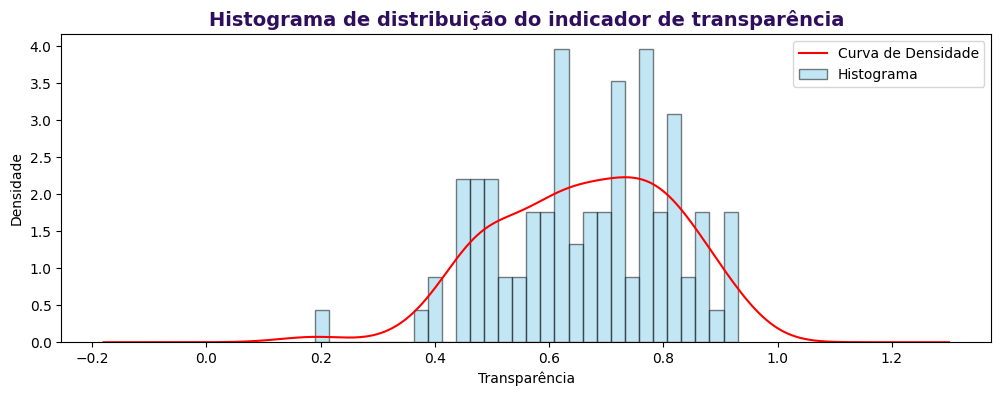

In [26]:
# Plotando um histograma de "distribuição do indicador de transparencia" com curva de densidade sobreposta
#
fig, ax = plt.subplots(figsize = (12, 4))
ax.hist(df_tabelao[ 'itai' ], bins = 30, edgecolor = 'black', alpha = 0.5, color = 'skyblue', density = True)
df_tabelao[ 'itai' ].plot(kind = 'kde', color = 'red', ax = ax)

# Definindo as linhas gerais do gráfico
#
ax.set_xlabel( 'Transparência' )
ax.set_ylabel( 'Densidade' )
ax.set_title( 'Histograma de distribuição do indicador de transparência', weight = "bold", color = "#2F0F5D", fontsize = 14 )
ax.legend([ 'Curva de Densidade', 'Histograma' ])
plt.show()

Observaremos a seguir a distribuição da população entre os municípios do Rio de Janeiro.

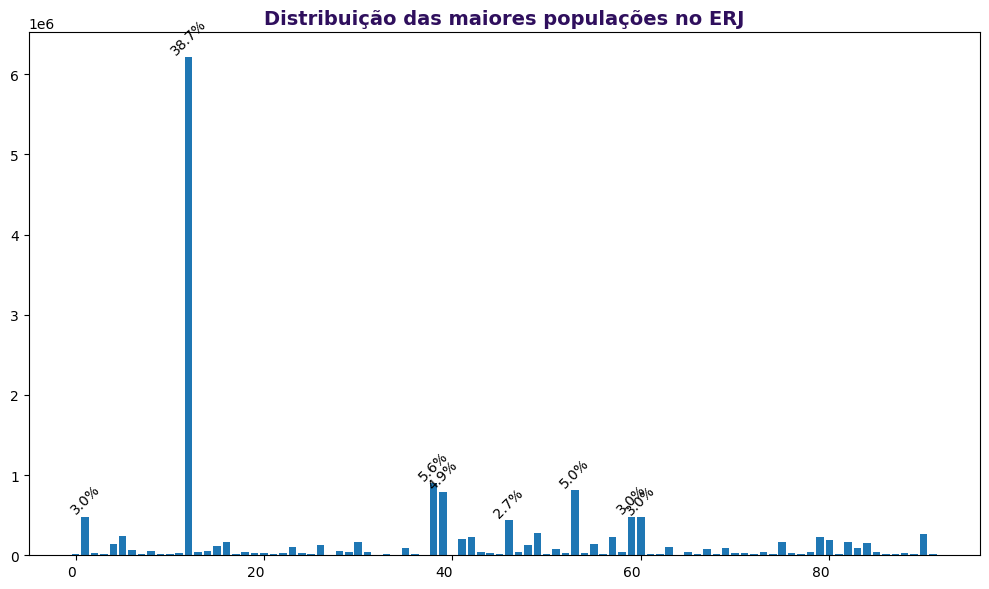

In [29]:
# Plotando um gráfico de barras mostrando os 5 municípios com maior população
#

# ordenando os municípios pela população
df_tabelao_5p = df_tabelao.sort_values(by=['populacao'], ascending=False)
df_tabelao_5p

counts = df_tabelao_5p[ 'populacao' ]
counts = counts.iloc[0:92]

rotulos = counts.index

# Calculate percentages
total = counts.sum()
percentages = counts / total * 100

# Definindo as linhas gerais do gráfico
#
plt.figure(figsize = (10, 6)) # Increased figure size for better visibility
bars = plt.bar(x = rotulos, height = counts) # Added height argument
plt.title( 'Distribuição das maiores populações no ERJ' , weight = "bold", color = "#2F0F5D", fontsize = 14)
plt.xticks(ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Display percentages on bars
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    if percentage > 2:
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', rotation=45, ha='center', va='bottom')

plt.show()

Podemos perceber graficamente como a população do Rio de Janeiro se distribui de forma desigual.

Com 38.7% da população total do Estado, moram na capital do Rio de Janeiro cerca de 6,2 milhões de pessoas, de um total de 16 milhões.

Em seguida vem São Gonçalo (5,6%), Duque de Caxias (5.0%), Nova Iguaçu (4,9%) e Belfort Roxo (3.0%), Niteroi (3.0%) e São João de Meriti (2,7%), todos da região Metropolitana.

Conhecidas como cidades "dormitório", boa parte de sua população se desloca diariamente para trabalhar ou estudar na cidade do Rio de Janeiro.

É também na capital fluminense que se concentram os pricipais hospitais, universidades, órgãos públicos, escritórios de serviços especializados, museus, teatros, cinemas, shows, etc., aumentando o fluxo de pessoas que procuram essas atividades.

Somando-se todos os 30 municípios da região metropolitana, temos mais de 12,3 milhões de habitantes (76,6%) .

Veremos a seguir um gráfico *wordcloud* da população dos minicípios do Estado do Rio de Janeiro.

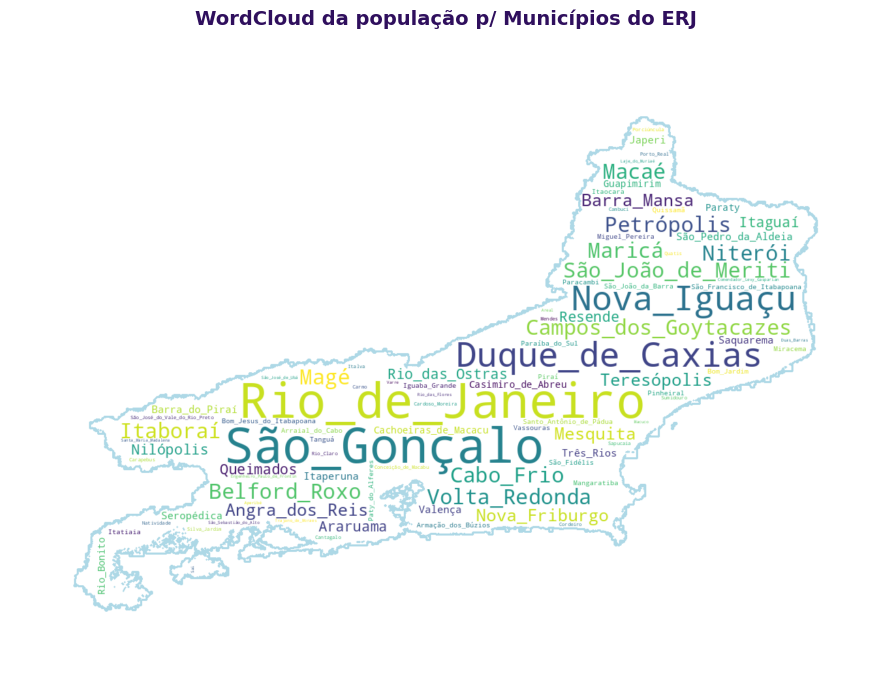

In [30]:
# trocando os espaços nos nomes dos municípios
df_tabelao['nome_municipio'] = df_tabelao['nome_municipio'].str.replace(' ', '_',)

# ordenando os municípios pela população
df_tabelao = df_tabelao.sort_values(by=['populacao'], ascending=False)

# abrindo uma imagem e a transformando em um array do numpy
imagem_rj = requests.get("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_mapa-rj.png")
image_mask = np.array(Image.open(BytesIO(imagem_rj.content)))

text = " ".join(title for title in df_tabelao[ 'nome_municipio'] )
wordcloud = WordCloud(background_color = 'white', mask=image_mask, contour_width = 3, contour_color = 'lightblue', collocations = False).generate(text)

plt.figure(figsize = (20, 8)) # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis( 'off' ) # remove as bordas
plt.title( 'WordCloud da população p/ Municípios do ERJ\n' , weight = "bold", color = "#2F0F5D", fontsize = 14)
plt.show() # mostra a word cloud

Verificamos que é o município da Cidade do Rio de Janeiro que possui - de longe - a maior população entre os 92 municípios estudados.

Em segundo lugar vem São Gonçalo, com seis vezes menos (pouco mais de 1 milhão), Duque de Caxias (com cerca de 900 mil) e Nova Iguaçu (com pouco mais de 800 mil habitantes).

Qual é o maior município do RJ em área total (em km²)? E o menor?

In [43]:
# Descobrindo o maior município do RJ em área total
#
df_test = df_tabelao
municipio_maior_area = df_tabelao['area'].max()
nome_municipio_maior = df_test['nome_municipio'], df_test['area'].max()
index_municipio_maior = df_test['area'].idxmax()
nome_municipio_maior = df_test.loc[index_municipio_maior, 'nome_municipio']
print(f"{nome_municipio_maior} é o município do RJ com menor área total e possui {municipio_maior_area} km²")

Campos_dos_Goytacazes é o município do RJ com menor área total e possui 4032.48 km²


In [44]:
# Descobrindo o menor município do RJ em área total
#
df_test = df_tabelao
municipio_menor_area = df_test['area'].min()
nome_municipio_menor = df_test['nome_municipio'], df_test['area'].min()
index_municipio_menor = df_test['area'].idxmin()
nome_municipio_menor = df_test.loc[index_municipio_menor, 'nome_municipio']
print(f"{nome_municipio_menor} é o município do RJ com menor área total e possui {municipio_menor_area} km²")

Nilópolis é o município do RJ com menor área total e possui 19.39 km²


Faremos agora o Gráfico de Densidade (*ou Density Plot*), que é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um *density plot* para cada atributo numérico do tabelão.

A altura da curva no eixo vertical (e sua distribuição no eixo horizontal) representam uma estimativa da probabilidade de um elemento possuir aquele valor.

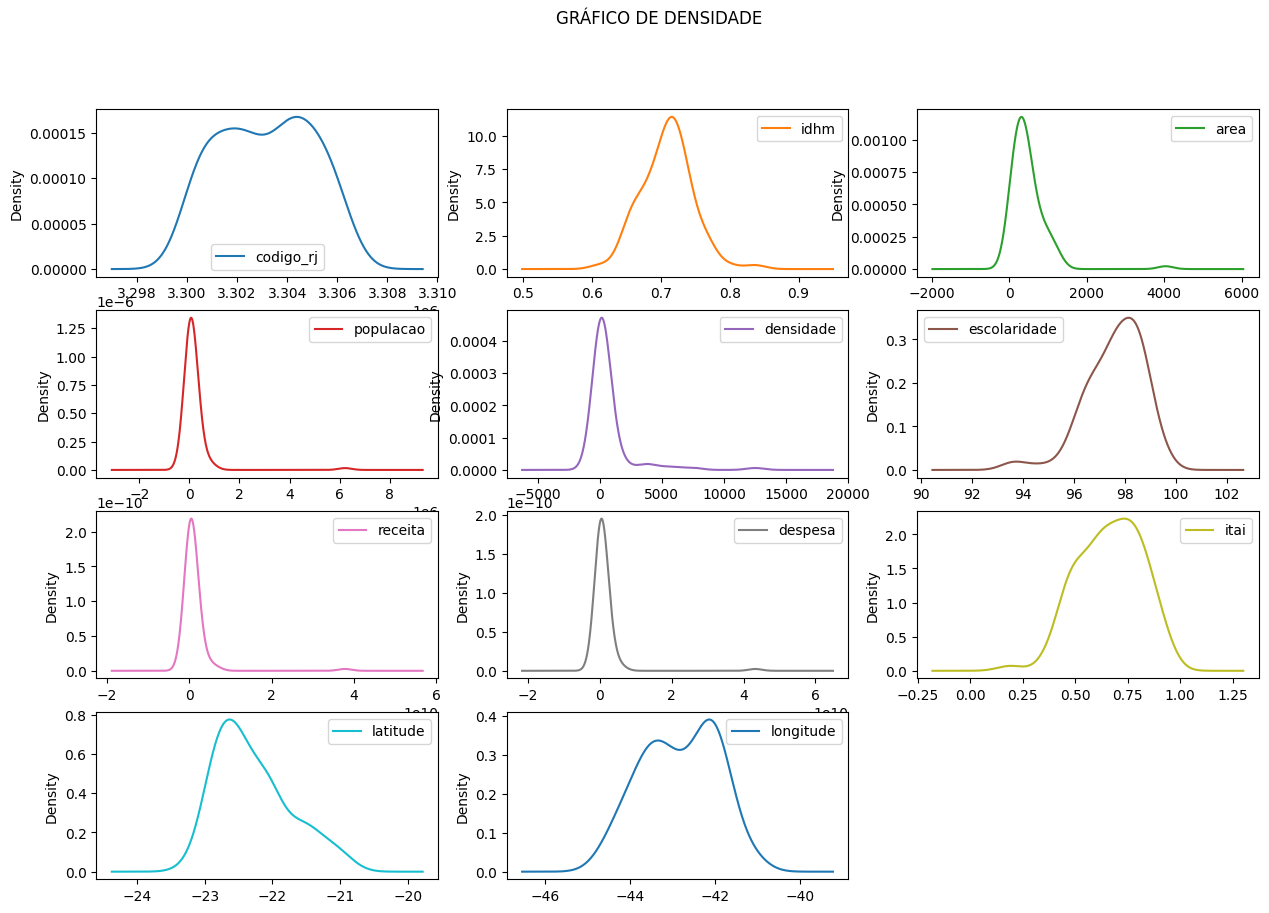

In [ ]:
# Plotando com o DensityPlot
#
df_tabelao.plot(title = "GRÁFICO DE DENSIDADE", kind = 'density', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Tirando o "*codigo_rj*" (um código criado pelo IBGE), "*latitude*" e "*longitude*" (que são valores fixos e estáticos), verificamos que "*area*", "*população*", "*densidade*", "*receita*" e "*despesa*" possuem comportamentos semelhantes. E o comportamento da "escolaridade" e "transparência" também se assemelham bastante.

Agora vamos trabalhar com *boxplots*. Nesse tipo de  gráfico, a linha no centro representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O *boxplot* ajuda a ter uma ideia da dispersão dos dataset e seus possíveis outliers.

> *OBS: Se um ponto do dataset é muito distante da média (maior ou menor que 3 vezes o desvio padrão), ele pode ser considerado um outlier.*


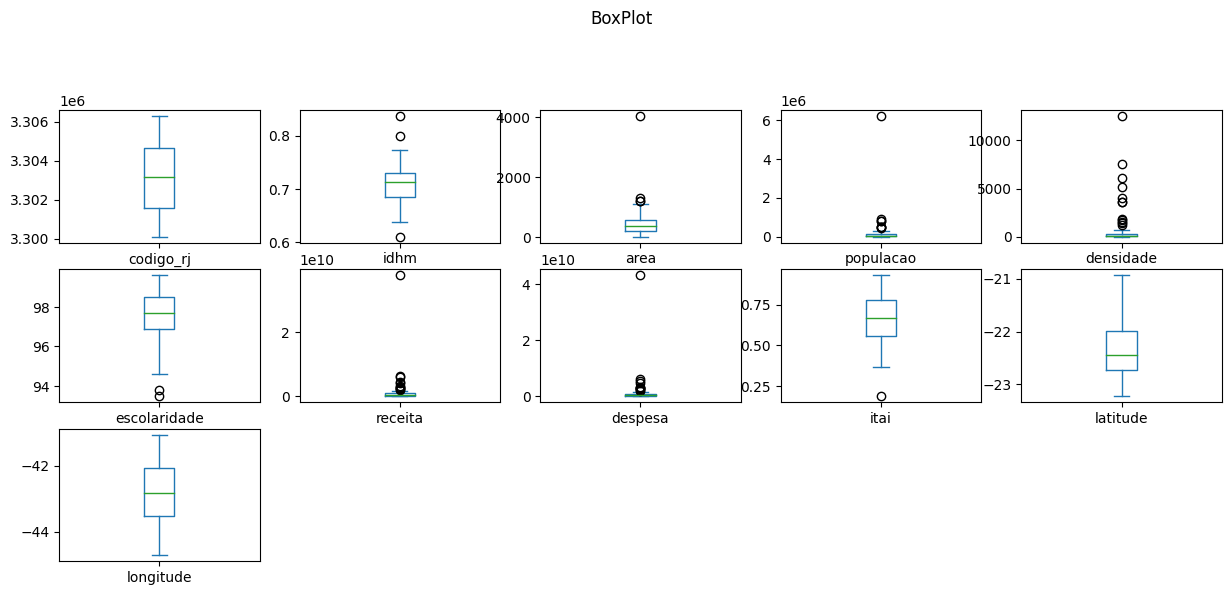

In [ ]:
# Plotando com o Boxplot
#
df_tabelao.plot(title = "BoxPlot", kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Podemos confirmar por esses gráficos as desigualdades entre os municípios do Estado do Rio de Janeiro.

Verificamos que o "*idhm*" possui alguns *outliers* para cima e para baixo, e "*escolaridade*" e "*transparência*" possuem somente alguns pontuais *outliers* para baixo.

Já os atributos "*area*", "*populacao*", "*receita*" e "*despesa*" possuem - em sua maioria - médias baixas e valores *outliers* muito altos, mostrando uma grande desigualdade entre seus valores. Com relação a esses atributos, mostra que muitos tem pouco, e poucos tem muito.

### 4.4 Categorização por IDHm
---

Indentificamos que o atributo de coluna "*idhm*" poderá ficar muito mais compreensível se o categorizarmos com 4 valores: baixo (inferior a 0,699), médio (entre 0,700 e 0,749), alto (entre 0,750 e 0,849), muito alto (superior a 0,850), já que nos municípios do Rio de Janeiro seus valores atualmente variam de 0,611 (Sumidouro) a 0,837 (Niterói).

Veremos o resultado dessa categorização em um gráfico *pizza*.

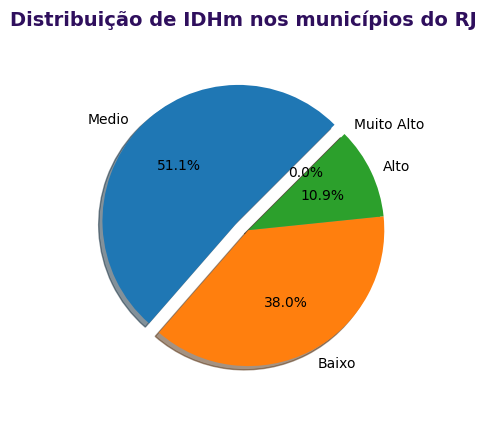

In [ ]:
# Categorizando o atributo de coluna "idhm"
#
# 'Baixo': (0.600 a 0.699)
# 'Medio': (0.700 a 0.749)
# 'Alto': (0.750 a 0.849)
# 'Muito Alto': (0.850 a 1.000)

# Criando a faixa de avaliação
bins = [0.600,0.700,0.750,0.850,1]
# Clasificando as faixas de avaliação
categoria_avaliacao = pd.cut(df_tabelao[ 'idhm' ].to_numpy(), bins=bins, labels=[ 'Baixo', 'Medio', 'Alto' , 'Muito Alto'], ordered=False)

# Criando no dataset um novo atributo de coluna "Cat_Avaliacao" com os novos valores categorizados de "Avaliacao"
df_tabelao[ 'idhm_avaliacao' ] = categoria_avaliacao

# Plotando um gráfico pizza mostrando as faixas de avaliação dos clientes
#
counts = df_tabelao[ 'idhm_avaliacao' ].value_counts()
rotulos = counts.index
explode = (0.1, 0, 0, 0)

# Definindo as linhas gerais do gráfico
#
plt.figure(figsize = (4, 5))
plt.pie(x=counts, labels=rotulos, explode=explode, autopct = '%1.1f%%', startangle=45, shadow=True)
plt.title( 'Distribuição de IDHm nos municípios do RJ', weight = "bold", color = "#2F0F5D", fontsize = 14)
plt.axis( 'equal' )
plt.show()

Com a categorização do idhm, e sua visualização em um *pie chart*, conseguimos entender melhor a distribuição desse índice de desenvolvimento humano.

Dessa forma, percebemos que o município do Estado do Rio de Janeiro ainda tem um grande caminho a percorrer, sendo pouco mais de 10% dos municípios categoriazados com "alto", e nenhum como "muito alto".

> OBS: O cálculo do índice IDHm (Índice de Desenvolvimento Humano Municipal) no Brasil leva em conta três componentes: IDHm Longevidade, IDHm Educação e IDHm Renda, agrupados por meio da média geométrica. Por ser um índice de 3 dimensões, é uma versão modificada do IDH, não sendo recomendada para comparação com outros países que usam o IDH padrão, devendo servir de parâmetro apenas entre os municípios do Brasil.

Para verificar se existe alguma correlação de atributos de um dataset, a matriz de correlação de *Pearson* costuma ser a ferramenta mais apropriada, já que ela mostra o grau de relação linear entre cada par de variáveis, no formato de uma matriz bidimensional.

Seus valores podem ter variar entre -1 e +1. Se os dois atributos tendem a aumentar e diminuir juntas, o valor de sua correlação é positivo. Se um atributo de coluna aumenta enquanto o outro diminui, o valor de correlação é negativo. Quando está póximo de zero, não há correlação significativa entre os atributos.

                                     MATRIZ DE CORRELAÇÃO


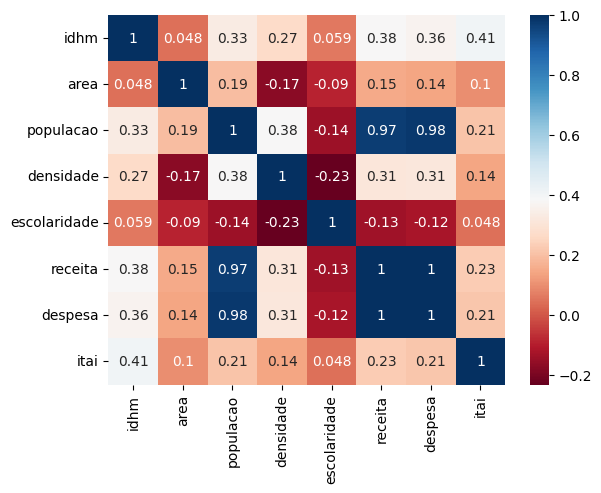

In [ ]:
# Criando uma matriz de Correlação com MatPlotLib Seaborn
#
df_matriz_correlacao = df_tabelao[['idhm', 'area', 'populacao', 'densidade', 'escolaridade', 'receita', 'despesa', 'itai']]
print("                                     MATRIZ DE CORRELAÇÃO", )
sns.heatmap(df_matriz_correlacao.corr(), annot=True, cmap='RdBu');

Ao visualizarmos as correlações entre os atributos selecionados através da matriz de correlação, a corelação entre (populacao x receita) e (populacao x despesa) é óbvia e tem valor praticamente igual a 1. Quanto maior a população, maior a arrecadação de impostos, ocasioando maiores receitas e, consequentemte, maiores despesas.

Desta forma a informação mais importante desse gráfico é que podemos perceber que (idhm x itai) possui o maior índice *Pearson*, seguido de (idhm x receita), (idhm x despesa), (idhm x populacao) e (idmh x densidade populacional).

Isso demonstra estatisticamente que, quanto maior a transparência do município, maior é o seu desenvolvimento humano.

Ou, olhando de outra forma, quanto maior o desenvolvimento humano do munícipio, maior é o seu investimento em transparência.

Também mostra que, por ter os melhores serviços públicos e privados por causa de sua receita, a região metropolitana atrai boa parte da população, permitindo a melhoria do idhm da sua população.


### 4.5 Mapa Coroplético
---

Montaremos gráficos do tipo *Mapa Coroplético* mostrando a taxa de transparência e o IDHm de cada município do Rio de Janeiro.

Inicialmente precisaremos ler alguns arquivos com representações de dados geográficos.

In [ ]:
# Lendo os arquivos com as fronteiras dos municípios do ERJ
geojson_rj = "https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mpv3_geojs-rj.json"
# Lendo o arquivo com coordenadas das capitais dos minicípios do ERJ
dados_calor = np.genfromtxt("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_dados_calor.csv", delimiter = ';' , encoding='latin1')
# Lendo o arquivo com o informações dos municipios
dataset_gps = pd.read_csv("https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/mvp3_tabelao.csv", delimiter = ';', encoding = 'utf-8', decimal=",")

Agora montaremos a função que irá ser chamada para montar o mapa coroplético do índice selecionado, retornando um mapa do Estado do Rio de Janeiro em formato HTML.

In [ ]:
# Mapa coropletico de índices
def mapa_colopletico(indice):

    # Verifica se a coluna 'indice' existe no DataFrame 'df_tabelao'
    if indice not in df_tabelao.columns:
        print(f"Erro: Coluna '{indice}' nao existe no DataFrame.")
        return None

    # initializa mapa
    mapa_rj = folium.Map([-21.93009349109802, -42.60928289352865],
                            tiles = "cartodbpositron",
                            zoom_start = 8)

    #Definindo o nome do indice
    INDICADOR = indice

    # definindo a cor aleatória do mapa
    graph_color = ["BuGn", "BuPu", "GnBu", "OrRd", "PuBu", "PuBuGn", "PuRd", "RdPu", "YlGn", "YlGnBu", "YlOrBr", "YlOrRd"]
    X = random.randint(0,11)
    FILL_COLLOR = graph_color[X]

    # Criando o mapa
    folium.Choropleth(
                    geo_data = geojson_arquivo,
                    data = df_tabelao,
                    columns = ["nome_municipio",  indice],
                    key_on = "feature.properties.name",
                    fill_color = FILL_COLLOR,
                    # fill_color = "GnBu",
                    fill_opacity = 0.9,
                    line_opacity = 0.5,
                    legend_name = INDICADOR,
                    nan_fill_color = "white",
                    name = "Dados"
    ).add_to(mapa_rj)

    # Adicionando a função de destaque
    estilo = lambda x: {"fillColor": "white",
                      "color": "black",
                      "fillOpacity": 0.001,
                      "weight": 0.001}

    estilo_destaque = lambda x: {"fillColor": "red",
                                "color": "black",
                                "fillOpacity": 0.5,
                                "weight": 1}

    highlight = folium.features.GeoJson(data = geojson_arquivo,
                                      style_function = estilo,
                                      highlight_function = estilo_destaque,
                                      name = "Destaque")

    # Adicionando caixa de texto
    folium.features.GeoJsonTooltip(fields = ["name", indice],
                                  aliases = [ "Municipio", indice],
                                  labels = True,
                                  style = ("background-color: white; color: black; font-family: arial; font-size: 16px; padding: 10px;")).add_to(highlight)

    # Adicionando o destaque ao mapa
    mapa_rj.add_child(highlight)

    # Adicionando o controle de camadas
    folium.LayerControl().add_to(mapa_rj)

    # Salvando o mapa de calor do indice
    mapa_rj.save("mapa_rj_" + indice + ".html")

    # Mostrando mapa IDHM
    return mapa_rj

Aqui chamaremos a rotina que gera o mapa para o índice *IDHm*.

In [ ]:
# construindo o mapa para "idhm"
mapa_idhm_rj = mapa_colopletico("idhm")
mapa_idhm_rj

O mapa gerado tem o nome de "mapa_rj_idhm.html".

Ao passar o mouse sobre o município, podemos observar o nome do município e seu valor numérico de *IDHm*.

Também podemos ter uma visão geral, por meio de uma escala de cores acima à direita, de todos os *IDHm* do Estado.

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Mapa_Idhm.JPG" width="950"/>


Aqui chamaremos a rotina que gera o mapa para o índice *itai*.

In [ ]:
# construindo o mapa para "itai"
mapa_tce_rj = mapa_colopletico("itai")
mapa_tce_rj

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Mapa_Itai.JPG" width="950"/>

O mapa gerado tem o nome de "mapa_rj_itai.html".

### 4.6 Cinco Perguntas em SQL
---

Quais são os municípios que possuem *idhm* maior que 0.75 e *itai* maior que 0.8 ?

In [ ]:
# Quais sao os municipios que possuem idhm > 0.75 e itai maior que 0.80 ?
#
spark.sql("USE SCHEMA tabelao;")
SQL1 = spark.sql("""
                  SELECT nome_municipio
                  FROM mvp3_tabelao
                  WHERE idhm > 0.75 AND itai > 0.8
                  """)
display(SQL1)

**➔Resposta**: Nilópolis, Macaé, Rio de Janeiro, Resende, Maricá, Niterói

Quais são os 5 municípios que possuem maior receita total ?

In [ ]:
# Quais são os 5 municípios que possuem maior receita ?
#
spark.sql("USE SCHEMA tabelao;")
SQL2 = spark.sql("""
                  SELECT nome_municipio
                  FROM mvp3_tabelao
                  ORDER BY receita DESC LIMIT 5
                  """)
display(SQL2)

**➔Resposta**: Rio de Janeiro, Maricá, Niterói, Duque de Caxias, Macaé

Quais são os 5 municípios que possuem maior populacao ? Mostre as suas quantidade de seus habitantes.

In [ ]:
# Quais sao os 6 municípios que possuem maior populacao ? Mostre as suas quantidade de seus habitantes.
#
spark.sql("USE SCHEMA tabelao;")
SQL3 = spark.sql("""
                  SELECT nome_municipio, populacao
                  FROM mvp3_tabelao
                  ORDER BY populacao DESC LIMIT 6
                  """)
display(SQL3)

**➔Resposta**: Rio de Janeiro/6.211.223, São Gonçalo/896.744, Duque de Caxias/808.161, Nova Iguaçu/785.867, Campos dos Goytacazes/483.540, Belford Roxo/483.087

Quais são os municípios que possuem receita maior que despesa e idhm alto ou muito alto (maior que 0.75)?

In [ ]:
# Quais sao os municipios que possuem receita maior que despesa e idhm alto ou muito alto (> que 0.750)?
#
spark.sql("USE SCHEMA tabelao;")
SQL4 = spark.sql("""
                  SELECT nome_municipio
                  FROM mvp3_tabelao
                  WHERE receita > despesa AND idhm > 0.75
                  """)
display(SQL4)

**➔Resposta**: Macaé, Resende, Maricá, Niterói

Quais os percentuais totais do número de municípios, por região?

In [ ]:
# Quais sao os percentuais totais do numero de municipios, por regiao ?
#
spark.sql("USE SCHEMA tabelao;")
SQL5 = spark.sql("""
                  SELECT regiao,
                         CAST(100.0 * COUNT(*) / SUM(COUNT(*)) OVER () AS DECIMAL(10,2)) AS percentage
                  FROM mvp3_tabelao
                  GROUP BY regiao
                  ORDER BY percentage DESC
                  LIMIT 10
                  """)
display(SQL5)

**➔Resposta**: Metropolitana	32.61%, Centro Fluminense	17.39%, Sul Fluminense	15.22%, Noroeste Fluminense	14.13%, Baixadas	10.87%, Norte Fluminense	9.78%

## 5 Conclusão
---

Sabemos que a corrupção e a desigualdade são um dos grandes desafios de nossa época. E também sabemos que a transparência e a democratização da informação são uma das formas de combater essas mazelas.

Ao iniciarmos esse MVP conseguimos verificar que, apesar da facilidade de se obter dados e informações com qualidade sobre o município do Rio de Janeiro, estes estão distribuidos e pulverizados em diversas fontes, mostrando a necessidade de se obter um portal que reuna todo esse conjunto, de forma simples e direta, para o seu acesso de estudantes, cientistas e o publico em geral.

Mesmo com a Lei Federal nº 12.527, de 18 de novembro de 2011, que dispõe sobre o acesso a livre e democrático das informações públicas, e que faz parte de um processo social de evolução do sistema jurídico brasileiro, verificamos que ainda temos um longo caminho a percorrer, para que essas informações sejam dispostas de forma facilitada para o público em geral, e não apenas para pessoas com tempo e conhecimento técnico para pesquisa.

A disponibilidade de informações relevantes permite a responsabilização dos gestores públicos por suas ações, fortalecendo a administração e o atendimento aos interesses da sociedade, e formando pilares que contribuem para uma gestão eficiente, democrática e confiável.

Com as informações levantadas por esse trabalho pudemos perceber, de forma mais clara - por exemplo - como as receitas e as despesas são feitas de forma desigual e heterogênea no Estado do Rio de Janeiro. Percebemos graficamente no mapa que existem bolsões de riqueza e probreza entre as regiões fluminenses.

E verificamos como os municípios de maior receita, IDHm e escolaridade são os municípios que, em sua maioria, possuem maior índice de transparência.

Assim concluímos - na prática - que a falta de transparência está ligada diretamente aos municípios com maiores deficiências econômicas e sociais.

Felizmente percebemos que atualmente existe um aumento na preocupação mundial com a melhoria dos níveis de governança e *accountability*, seja no setor público ou privado, seja nas organizações internacionais e não-governamentais.

A transparência e a *accountability* têm um impacto direto na qualidade dos serviços públicos oferecidos à população, ajudando a identificar e corrigir falhas, ineficiências e desvios. Assim é possível direcionar os recursos públicos de forma mais eficiente, aprimorando os serviços prestados.

Temos hoje uma crença de que o aumento da transparência pode nos levar, não somente a níveis maiores de *accountability*, como podemos fazer isso de maneira mais eficaz, em termos de custo, com o desenvolvimento da TI na Ciência da Dados.

Ao incrementar a transparência, acreditamos que é possível obter uma gestão pública comprometida com o interesse público, que busque melhorar o bem-estar da sociedade e permitindo um desenvolvimento mais sustentável.

## 6 Autoavaliação
---

Com 37 anos completos de serviços prestados como servidor público concursado no TCE-RJ, tendo como formação acadêmica completado os dois anos de ciclo básico de Engenharia na UFRJ, concluído o curso de Tecnólogo de Processamento de Dados na PUC-Rio (P-15), um curso de Administração de Empresas na UFRJ e um mestrado de Administração Pública na FGV-RJ, tenho trabalhado na última década no setor de TI do TCE-RJ como analista de suporte à rede e infra-estrutura de dados. E ultimamente tenho trabalhado na concessão e na administração de acessos à rede e aos sistemas do TCE-RJ.

Ao me aproximar dos 60 anos, enquanto vejo meus colegas de trabalho - que também atingem a mesma idade/tempo de seviço - sonharem com a aposentadoria, tomei a decisão de sair da minha zona de conforto, e com o incentivo da minha colega de trabalho Cecilia Ferrai (que fez esse curso de pós-graduação ano passado), decidi - para espanto de muitos - me inscrever no curso de pós-graduação de Ciência de Dados e Analytics na PUC-Rio.

Trabalhei no início da minha carreira como desenvolvedor de sistemas, e os conceitos básicos para a construção deste trabalho nunca foram um grande problema. Banco de dados relacional, linguagem SQL, modelagem de dados, catálogo da dados, nada disso foi grande novidade para mim. Novos apenas os conceitos de *Data Lake* e *Data Warehouse*.

No entanto, tive que começar do zero o uso do Databricks, e isso me deixou inseguro. Entender o seu conceito, tentar fazer pela primeira vez uma *pipeline* na prática, e conseguir integrar as ferramentas do Databricks com o GitHub e o Google Colab tomou bastante o meu tempo. Coisas simples como *path* de arquivos, problemas de conversão de vírgula em ponto, formatos incompatíveis, isso tudo me desanimou bastante. Somado à dificuldade em definir claramente qual problema que eu deseja resolver com este MVP, achando um projeto que adequado ao objetivo do curso, reconheço que houve momentos em que pensei na desistência dessa sprint.

Ainda sinto que meu domínio sobre ao ambiente Azure e a ferramenta Databricks é pequeno, mas depois de ver as dúvidas dos colegas nos plantões de dúvidas do MVP, - apesar das minhas limitações - vi que eu estava criando um monstro na minha cabeça. Então tomei um novo fôlego e decidi simplificar o projeto.

Por trabalhar para o Estado do Rio de Janeiro, pensei eu juntar informações sobre os municípios do Rio de Janeiro e, criando um tabelão com os principais índices socio-econômicos, considerei desenvolver um Portal de Transparência.

Com a idéia em mente de buscar uma vaga no setor de BI do TCE-RJ, pensei que seria interessante fazer um Portal de Transparência como projeto nessa sprint.

Minha abordagem para construir o projeto foi seguir as 3 camadas:
- Camada *bronze* - extração e carregamento de dados: esta etapa envolve a coleta de todos os dados brutos e seu armazenamento inicial em um único lugar.
- Camada *silver* - transformações de dados: nessa etapa, os dados passam por um processos de verificação, limpeza e transformação.
- Camada *gold* - consolidação dos dados: aqui os dados são consolidados em uma única tabela para gerar o mapa e as futuras consultas SQL.

Com relação ao *pipeline*, consegui fazer um chamado "extracao_mvp3" que importa automaticamente uma planilha do site do Ipea, conforme mostrado no capítulo 8. Também fiz um *WebScrap* no site da Wikepédia, onde consequi ler e salvar os links da páginas com todos os municípios do Rio de Janeiro, que por falta de tempo, não foi integrado nos mapas geográficos colopleticos e de calor. O *WebScrap* eu aprendi a fazer em um canal do *Youtube*.

Concuindo essas considerações, mesmo tendo passado por momentos de apreensão e desânimo, inseguro por estar num ambiente totalmente dsconheciso e sem conseguir enxergar muito bem uma luz no fim do túnel, percebo que - ao fazer essa autoanálise - os percalços e dificuldades ao longo do caminho são parte importante do aprendizado. Penso que poderia ter feito perguntas em SQLs mais elaboradas, ou buscado implementar uma opção que permita ver a progreção de índices por uma linha de tempo, mas esses desafios ficarão para depois.

Reconheço que se tivesse conseguido organizar mais cedo minhas idéias com relação a esse projeto, poderia ter ido mais além. Mas acredito consegui fazer até aqui alguma coisa interessante, e que possa ser aproveitada no futuro quando possivelmente estiver trabalhando no setor de BI do TCE-RJ.

## 7 Referências
---

* Indicador de Transparência TCE-RJ: https://www.tcerj.tc.br/consulta-processo/Mapa

* O que é o IDHM: https://www.undp.org/pt/brazil/o-que-e-o-idhm

* Dados Abertos TCE-RJ: https://dados.tcerj.tc.br/api/v1/

* API de serviço de dados do IBGE: https://servicodados.ibge.gov.br/api/docs/

* Geo Bases do IPEA: https://www.ipea.gov.br/ipeageo/bases.html

* Dados abertos do Governo do Estado do RJ: https://dadosabertos.rj.gov.br/

* Dash App Gallery: https://dash-gallery.plotly.host/Portal/

* Dash Components: https://dash.plotly.com/dash-core-components

* Plotly Graphs: https://plotly.com/python/

* The Callback: https://dash.plotly.com/basic-callbacks

* Plotly Express:https://plotly.com/python-api-referen...

* Dash Plotly Community Forum: https://community.plotly.com/c/dash/16




## 8 *PrintScreens* do MS-Azure
---

<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_01.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_02.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_03.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_04.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_05.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_06.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_07.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_08.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_Azure_09.JPG" width="1600"/>
<img src="https://raw.githubusercontent.com/Leo-Vincenzi/PUC-MVP_3/main/Capturar_GitHub_01.JPG" width="1600"/>